In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data set
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\preprodata\Preprocessed_dataset.csv')

In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features
y=df['type']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [4]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# predictions
y_pred = rfc.predict(X_test)

In [5]:
#Train the Model
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct

print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 92.61881772342024


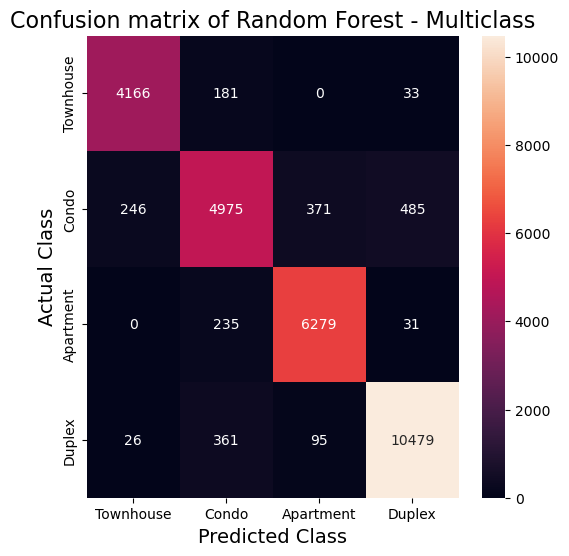

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the Confusion Matrix
LABELS = ['Townhouse', 'Condo', 'Apartment', 'Duplex']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Random Forest - Multiclass',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()